# LL

## Liên kết dữ liệu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

# Đường dẫn tới tệp pickle trên Google Drive
model_file_path = '/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/model_RF.pkl'

# Tải mô hình từ tệp pickle
with open(model_file_path, 'rb') as file:
    model = pickle.load(file)

# Kiểm tra mô hình đã tải thành công
print(model)



RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       n_estimators=50)


In [3]:
import pandas as pd

# Đường dẫn tới tệp dữ liệu filtered.csv Google Drive
data_file_path = '/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/Get compound/Pubchem/filtered.csv'

# Tải dữ liệu vào DataFrame
df = pd.read_csv(data_file_path)

# Hiển thị một vài dòng đầu của DataFrame để kiểm tra
df.head()


PUBCHEM_SID  PUBCHEM_CID  \
0   24834766.0   16196702.0   
1   14722067.0    1452362.0   
2   24834100.0    4215262.0   
3   24787839.0    2940489.0   
4   14721901.0    3226716.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES  FP_0  FP_1  FP_2  FP_3  \
0              CN(C)C(CC1=CC=CC=C1)C(=O)C2=CC=CS2.Cl     0     1     0     0   
1    CC(C)N1C(=NN=N1)SCC(=O)N2CCN(CC2)C(=O)C3=CC=CO3     0     1     0     0   
2    CCC1=CC=C(C=C1)NC(=O)C(C)OC(=O)C2=C(N=CC=C2)OCC     0     1     0     0   
3  CC1C=CCC2C1C(=O)N(C2=O)C3=CC=C(C=C3)OC(=O)C4=C...     0     0     0     0   
4                      C1CCC(CC1)NC(=O)NCCCN2CCCC2=O     0     0     1     0   

   FP_4  FP_5  FP_6  ...  FP_2042  FP_2043  FP_2044  FP_2045  FP_2046  \
0     0     0     0  ...        0        0        0        0        0   
1     0     0     0  ...        0        0        0        0        0   
2     0     0     0  ...        0        0        0        0        0   
3     0     1     0  ...        0        0        0        0        0   
4     0     0     0  ...        0        0        0        0        0   

   FP_2047  MolecularWeight    LogP  NumHDonors  NumHAcceptors  
0        0          295.835  3.5255           0              3  
1        0          364.431  0.9237           0              8  
2        0          342.395  3.2267           1              5  
3        0          367.426  3.6689           0              5  
4        0          267.373  1.6308           2              2  

[5 rows x 2055 columns]

## Predict

In [4]:
# Cài đặt rdkit nếu chưa có
!pip install rdkit

from google.colab import drive
import pickle
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
import numpy as np
from rdkit.DataStructs import ConvertToNumpyArray



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 18.7 MB/s eta 0:00:00


In [5]:
# Tạo Morgan Fingerprint Generator
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# Hàm chuyển đổi SMILES thành đặc trưng fingerprint
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = morgan_gen.GetFingerprint(mol)
    arr = np.zeros((1,), dtype=int)
    ConvertToNumpyArray(fp, arr)
    return arr

# Chuyển đổi SMILES thành đặc trưng fingerprint
fingerprints = df['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(smiles_to_fingerprint)

# Lọc ra các giá trị None do lỗi chuyển đổi SMILES
valid_fingerprints = fingerprints[fingerprints.notnull()]

# Chuyển đổi list thành numpy array để đưa vào mô hình
X = np.array(valid_fingerprints.tolist())

# Sử dụng mô hình để dự đoán
predictions = model.predict(X)

# Thêm kết quả dự đoán vào DataFrame
df.loc[valid_fingerprints.index, 'predictions'] = predictions

# Hiển thị DataFrame với các kết quả dự đoán
print(df.head())

# Lưu DataFrame với kết quả dự đoán vào tệp CSV mới
output_file_path = '/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/machine learning/2predictions.csv'
df.to_csv(output_file_path, index=False)

print(f"Results saved to: {output_file_path}")

   PUBCHEM_SID  PUBCHEM_CID  \
0   24834766.0   16196702.0   
1   14722067.0    1452362.0   
2   24834100.0    4215262.0   
3   24787839.0    2940489.0   
4   14721901.0    3226716.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES  FP_0  FP_1  FP_2  FP_3  \
0              CN(C)C(CC1=CC=CC=C1)C(=O)C2=CC=CS2.Cl     0     1     0     0   
1    CC(C)N1C(=NN=N1)SCC(=O)N2CCN(CC2)C(=O)C3=CC=CO3     0     1     0     0   
2    CCC1=CC=C(C=C1)NC(=O)C(C)OC(=O)C2=C(N=CC=C2)OCC     0     1     0     0   
3  CC1C=CCC2C1C(=O)N(C2=O)C3=CC=C(C=C3)OC(=O)C4=C...     0     0     0     0   
4                      C1CCC(CC1)NC(=O)NCCCN2CCCC2=O     0     0     1     0   

   FP_4  FP_5  FP_6  ...  FP_2043  FP_2044  FP_2045  FP_2046  FP_2047  \
0     0     0     0  ...        0        0        0        0        0   
1     0     0     0  ...        0        0        0        0        0   
2     0     0     0  ...        0        0        0        0        0   
3     0     1     0  ...        0       

## Lọc active

In [6]:
# Lọc các hợp chất active
active_compounds = df[df['predictions'] == 1]

# Đường dẫn tới tệp để lưu các hợp chất active
active_file_path = '/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/active_compounds.csv'

# Lưu các hợp chất active vào tệp CSV
active_compounds.to_csv(active_file_path, index=False)

print(f"Active compounds saved to: {active_file_path}")


Active compounds saved to: /content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/active_compounds.csv


## Lọc theo Ro5

In [7]:
import pandas as pd

# Đường dẫn tới tệp chứa các hợp chất active
active_file_path = '/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/active_compounds.csv'

# Tải dữ liệu vào DataFrame
active_df = pd.read_csv(active_file_path)

# Hiển thị một vài dòng đầu của DataFrame để kiểm tra
print(active_df.head())

# Tiêu chí Lipinski's Rule of Five
def ro5_filter(df):
    return df[
        (df['MolecularWeight'] <= 500) &
        (df['LogP'] <= 5) &
        (df['NumHDonors'] <= 5) &
        (df['NumHAcceptors'] <= 10)
    ]

# Lọc các hợp chất theo tiêu chí Ro5
ro5_compounds = ro5_filter(active_df)

# Đường dẫn tới tệp để lưu các hợp chất thỏa mãn Ro5
ro5_file_path = '/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/ro5_compounds.csv'

# Lưu các hợp chất thỏa mãn Ro5 vào tệp CSV
ro5_compounds.to_csv(ro5_file_path, index=False)

print(f"Compounds satisfying Ro5 saved to: {ro5_file_path}")


   PUBCHEM_SID  PUBCHEM_CID  \
0   17506068.0    1561895.0   
1   22402015.0    5051642.0   
2   14722854.0    2043339.0   
3   17513066.0    5926970.0   
4   24833983.0   16196586.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES  FP_0  FP_1  FP_2  FP_3  \
0  CC(C)COC(=O)/C(=C/C1=CN(C2=CC=CC=C21)CC3=CC=CC...     0     1     0     0   
1  C1CN(CCN1C2=CC=C(C=C2)O)C3=C(C=C(C=C3)[N+](=O)...     0     0     0     0   
2    COC1=C(C=C(C=C1)S(=O)(=O)NCCSC2=CC=C(C=C2)Cl)OC     0     0     0     0   
3  CC1=CC=CN2C1=NC(=C(C2=O)/C=C(\C#N)/C(=O)NC)N(C...     0     0     0     0   
4  CC[C@H](C)[C@@H](C(=O)N1CCN(CC1)C2=NC(=NC(=N2)...     0     1     0     0   

   FP_4  FP_5  FP_6  ...  FP_2043  FP_2044  FP_2045  FP_2046  FP_2047  \
0     0     0     0  ...        0        0        0        0        0   
1     0     0     0  ...        0        0        0        0        0   
2     0     0     0  ...        0        0        0        0        0   
3     0     0     0  ...        0       

## Xác định số lượng các chất

In [8]:
import pandas as pd

# Đường dẫn tới tệp dự đoán
predictions_file_path = '/content/drive/My Drive/3.Thesis 2/Weekly tasks/Teachopen CADD/machine learning/2predictions.csv'

# Tải dữ liệu vào DataFrame
df = pd.read_csv(predictions_file_path)

# Tiêu chí Lipinski's Rule of Five
def ro5_filter(df):
    return df[
        (df['MolecularWeight'] <= 500) &
        (df['LogP'] <= 5) &
        (df['NumHDonors'] <= 5) &
        (df['NumHAcceptors'] <= 10)
    ]

# Tổng số hợp chất ban đầu
total_compounds = len(df)

# Tổng số hợp chất active và inactive
total_active = len(df[df['predictions'] == 1])
total_inactive = len(df[df['predictions'] == 0])

# Hợp chất active đủ tiêu chí Ro5 và không đủ tiêu chí Ro5
active_df = df[df['predictions'] == 1]
active_ro5 = len(ro5_filter(active_df))
active_not_ro5 = total_active - active_ro5

# Hợp chất inactive đủ tiêu chí Ro5 và không đủ tiêu chí Ro5
inactive_df = df[df['predictions'] == 0]
inactive_ro5 = len(ro5_filter(inactive_df))
inactive_not_ro5 = total_inactive - inactive_ro5

# In kết quả
print(f"Tổng số hợp chất ban đầu: {total_compounds}")
print(f"Tổng số hợp chất active: {total_active}")
print(f"Tổng số hợp chất inactive: {total_inactive}")
print(f"Số lượng hợp chất active đủ tiêu chí Ro5: {active_ro5}")
print(f"Số lượng hợp chất active không đủ tiêu chí Ro5: {active_not_ro5}")
print(f"Số lượng hợp chất inactive đủ tiêu chí Ro5: {inactive_ro5}")
print(f"Số lượng hợp chất inactive không đủ tiêu chí Ro5: {inactive_not_ro5}")


Tổng số hợp chất ban đầu: 6025
Tổng số hợp chất active: 3550
Tổng số hợp chất inactive: 2475
Số lượng hợp chất active đủ tiêu chí Ro5: 17
Số lượng hợp chất active không đủ tiêu chí Ro5: 3533
Số lượng hợp chất inactive đủ tiêu chí Ro5: 1035
Số lượng hợp chất inactive không đủ tiêu chí Ro5: 1440


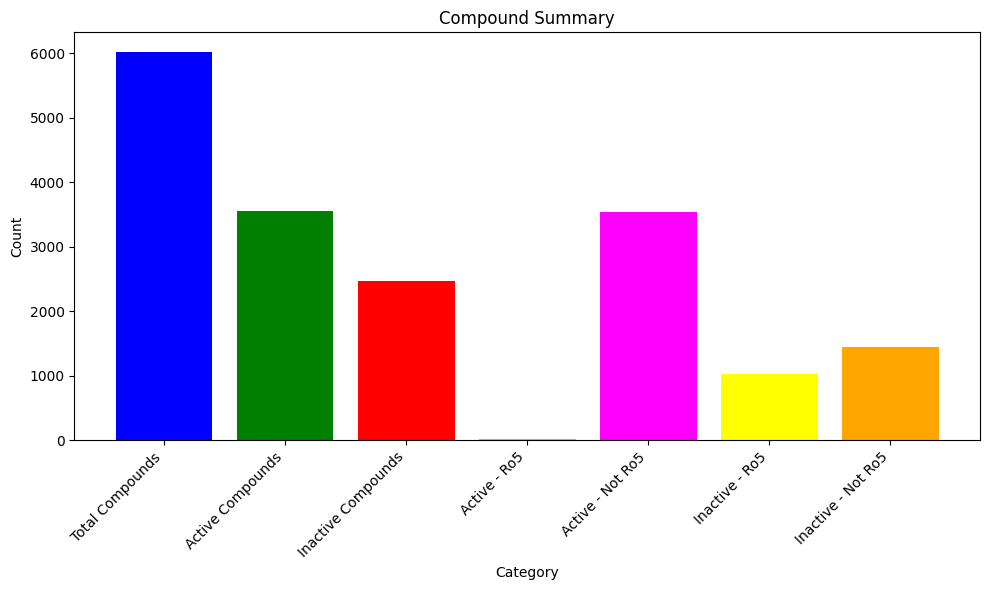

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Tạo DataFrame để hiển thị số liệu
summary_df = pd.DataFrame({
    'Category': ['Total Compounds', 'Active Compounds', 'Inactive Compounds',
                 'Active - Ro5', 'Active - Not Ro5', 'Inactive - Ro5', 'Inactive - Not Ro5'],
    'Count': [total_compounds, total_active, total_inactive,
              active_ro5, active_not_ro5, inactive_ro5, inactive_not_ro5]
})

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Category'], summary_df['Count'], color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Compound Summary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()
